In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
metadata = pd.read_csv('/content/Metadata_Country.csv')
population = pd.read_csv('/content/country_population.csv')
fertility = pd.read_csv('/content/fertility_rate.csv')
expectancy = pd.read_csv('/content/life_expectancy.csv')

country dataset

In [ ]:
metadata.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


In [ ]:
# remove unwanted columns
metadata.drop(['SpecialNotes', 'Unnamed: 5', 'IncomeGroup'], axis=1, inplace=True)

In [ ]:
# Using dataframe country: Change table name into country name

metadata.rename(columns={'TableName': 'Country Name'}, inplace=True)

In [ ]:
metadata

,Country Code,Region,Country Name
0,ABW,Latin America & Caribbean,Aruba
1,AFG,South Asia,Afghanistan
2,AGO,Sub-Saharan Africa,Angola
3,ALB,Europe & Central Asia,Albania
4,AND,Europe & Central Asia,Andorra
...,...,...,...
258,XKX,Europe & Central Asia,Kosovo
259,YEM,Middle East & North Africa,"Yemen, Rep."
260,ZAF,Sub-Saharan Africa,South Africa
261,ZMB,Sub-Saharan Africa,Zambia


In [ ]:
metadata.isna().sum()

Country Code     0
Region          46
Country Name     0
dtype: int64

fertility dataset

In [ ]:
fertility.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fertility.shape

(264, 61)

In [ ]:
fertility.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [ ]:
fertility.fillna(fertility.mean(), inplace=True)

<ipython-input-11-e6402a79f448>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fertility.fillna(fertility.mean(), inplace=True)


In [ ]:
fertility.dropna(axis =0,inplace=True)

In [ ]:
fertility.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.4170,3.22600,...,1.763,1.764,1.769,1.776,1.783000,1.791000,1.79600,1.800000,1.801000,1.800000
1,AFG,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.450000,7.4500,7.45000,...,6.460,6.254,6.038,5.816,5.595000,5.380000,5.17400,4.981000,4.802000,4.635000
2,AGO,7.478000,7.524000,7.563000,7.592000,7.611000,7.619000,7.618000,7.6130,7.60800,...,6.368,6.307,6.238,6.162,6.082000,6.000000,5.92000,5.841000,5.766000,5.694000
3,ALB,6.489000,6.401000,6.282000,6.133000,5.960000,5.773000,5.581000,5.3940,5.21800,...,1.668,1.650,1.646,1.653,1.668000,1.685000,1.70000,1.710000,1.714000,1.713000
4,AND,5.508217,5.493573,5.495798,5.495507,5.458346,5.415664,5.365999,5.3277,5.27433,...,1.180,1.250,1.190,1.270,2.877849,2.843581,2.81519,2.791648,2.757183,2.728593


population dataset

In [ ]:
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [ ]:
population.shape

(264, 61)

In [ ]:
population.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [ ]:
population.dropna(axis =0,inplace=True)

In [ ]:
population = population.round(decimals=0)

In [ ]:
population.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [ ]:
population.shape

(258, 58)

In [ ]:
population.isna().sum()

Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014      

life expectancy

In [ ]:
expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,74.576,74.725,74.872,75.016,75.158,75.299,75.440,75.582,75.725,75.867
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,59.694,60.243,60.754,61.226,61.666,62.086,62.494,62.895,63.288,63.673
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,55.096,56.189,57.231,58.192,59.042,59.770,60.373,60.858,61.241,61.547
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,75.656,75.943,76.281,76.652,77.031,77.389,77.702,77.963,78.174,78.345
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
expectancy.shape

(264, 61)

In [ ]:
expectancy = expectancy.fillna(expectancy.mean()).round(decimals=0)

<ipython-input-24-0bf33c51dcf3>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  expectancy = expectancy.fillna(expectancy.mean()).round(decimals=0)


In [ ]:
expectancy.drop(['Country Name', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [ ]:
expectancy.dropna(axis =0,inplace=True)

In [ ]:
expectancy.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,ABW,66.0,66.0,66.0,67.0,67.0,67.0,68.0,68.0,68.0,...,75.0,75.0,75.0,75.0,75.0,75.0,75.0,76.0,76.0,76.0
1,AFG,32.0,33.0,33.0,34.0,34.0,34.0,35.0,35.0,36.0,...,60.0,60.0,61.0,61.0,62.0,62.0,62.0,63.0,63.0,64.0
2,AGO,33.0,34.0,34.0,34.0,35.0,35.0,35.0,36.0,36.0,...,55.0,56.0,57.0,58.0,59.0,60.0,60.0,61.0,61.0,62.0
3,ALB,62.0,63.0,64.0,65.0,65.0,66.0,66.0,66.0,66.0,...,76.0,76.0,76.0,77.0,77.0,77.0,78.0,78.0,78.0,78.0
4,AND,53.0,54.0,54.0,55.0,55.0,56.0,56.0,57.0,57.0,...,69.0,70.0,70.0,70.0,71.0,71.0,71.0,72.0,72.0,72.0


In [ ]:
expectancy.shape

(264, 58)

In [ ]:
expectancy.isna().sum()

Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014      

melt and merge function

In [ ]:
years = [str(i) for i in range(1960,2017)]
print(years)

['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


In [ ]:
# melt - unpivot the dataset

df = pd.melt(population,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Population')

In [ ]:
df

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996351.0
2,AGO,1960,5643182.0
3,ALB,1960,1608800.0
4,AND,1960,13411.0
...,...,...,...
14701,XKX,2016,1816200.0
14702,YEM,2016,27584213.0
14703,ZAF,2016,56015473.0
14704,ZMB,2016,16591390.0


In [ ]:
metadata_and_population_merge = pd.merge(metadata,df,how='left',on='Country Code')

In [ ]:
metadata_and_population_merge

,Country Code,Region,Country Name,Year,Population
0,ABW,Latin America & Caribbean,Aruba,1960,54211.0
1,ABW,Latin America & Caribbean,Aruba,1961,55438.0
2,ABW,Latin America & Caribbean,Aruba,1962,56225.0
3,ABW,Latin America & Caribbean,Aruba,1963,56695.0
4,ABW,Latin America & Caribbean,Aruba,1964,57032.0
...,...,...,...,...,...
14706,ZWE,Sub-Saharan Africa,Zimbabwe,2012,14710826.0
14707,ZWE,Sub-Saharan Africa,Zimbabwe,2013,15054506.0
14708,ZWE,Sub-Saharan Africa,Zimbabwe,2014,15411675.0
14709,ZWE,Sub-Saharan Africa,Zimbabwe,2015,15777451.0


In [ ]:
# add a melt for fertility
df_fertility = pd.melt(fertility,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Fertility Rate')
df_fertility

,Country Code,Year,Fertility Rate
0,ABW,1960,4.820000
1,AFG,1960,7.450000
2,AGO,1960,7.478000
3,ALB,1960,6.489000
4,AND,1960,5.508217
...,...,...,...
15043,XKX,2016,2.060000
15044,YEM,2016,3.995000
15045,ZAF,2016,2.458000
15046,ZMB,2016,4.981000


In [ ]:
# add melt for expectancy

df_expectancy = pd.melt(expectancy,
        id_vars='Country Code',
        value_vars=years,
        var_name='Year',
        value_name='Life Expectancy')
df_expectancy

,Country Code,Year,Life Expectancy
0,ABW,1960,66.0
1,AFG,1960,32.0
2,AGO,1960,33.0
3,ALB,1960,62.0
4,AND,1960,53.0
...,...,...,...
15043,XKX,2016,72.0
15044,YEM,2016,65.0
15045,ZAF,2016,63.0
15046,ZMB,2016,62.0


In [ ]:
# merge df_fertility and df_expectancy
df_fertility_and_expectancy = pd.merge(df_fertility, df_expectancy, how='left', on=['Country Code', 'Year'])

In [ ]:
df_fertility_and_expectancy

,Country Code,Year,Fertility Rate,Life Expectancy
0,ABW,1960,4.820000,66.0
1,AFG,1960,7.450000,32.0
2,AGO,1960,7.478000,33.0
3,ALB,1960,6.489000,62.0
4,AND,1960,5.508217,53.0
...,...,...,...,...
15043,XKX,2016,2.060000,72.0
15044,YEM,2016,3.995000,65.0
15045,ZAF,2016,2.458000,63.0
15046,ZMB,2016,4.981000,62.0


In [ ]:
# merge metadata_and_population_merge and df_fertility_and_expectancy

df = pd.merge(metadata_and_population_merge, df_fertility_and_expectancy, how='left', on=['Country Code', 'Year'])
df = df[['Country Name', 'Country Code', 'Region', 'Year', 'Population', 'Fertility Rate', 'Life Expectancy']]
df

,Country Name,Country Code,Region,Year,Population,Fertility Rate,Life Expectancy
0,Aruba,ABW,Latin America & Caribbean,1960,54211.0,4.820,66.0
1,Aruba,ABW,Latin America & Caribbean,1961,55438.0,4.655,66.0
2,Aruba,ABW,Latin America & Caribbean,1962,56225.0,4.471,66.0
3,Aruba,ABW,Latin America & Caribbean,1963,56695.0,4.271,67.0
4,Aruba,ABW,Latin America & Caribbean,1964,57032.0,4.059,67.0
...,...,...,...,...,...,...,...
14706,Zimbabwe,ZWE,Sub-Saharan Africa,2012,14710826.0,3.996,57.0
14707,Zimbabwe,ZWE,Sub-Saharan Africa,2013,15054506.0,3.957,58.0
14708,Zimbabwe,ZWE,Sub-Saharan Africa,2014,15411675.0,3.903,59.0
14709,Zimbabwe,ZWE,Sub-Saharan Africa,2015,15777451.0,3.836,60.0


In [ ]:
df.to_csv('merged_data.csv', index=False)

Animated Figures with Plotly Express




In [ ]:
px.scatter(df,
           x="Fertility Rate",
           y="Life Expectancy",
           animation_frame="Year",
           animation_group="Country Code",
           size="Population",
           size_max=float("180"),
           hover_name="Country Name",
           color="Region",
           template="plotly",
           labels={'Region'},
           range_x=[0,10],
           range_y=[10,90],
           title='Fertility Rate vs Life Expectancy')

In [ ]:
# map graph for country code and life expectancy

px.choropleth(df, locations="Country Code", color="Life Expectancy",  scope="asia", hover_name="Country Name", animation_frame="Year", animation_group="Country Code")

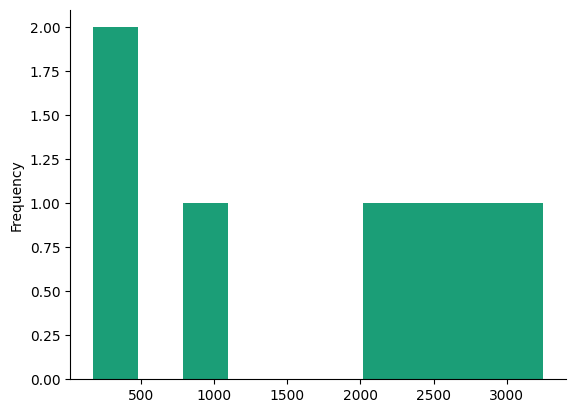

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.groupby('Region').size().plot(kind='hist', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#scatter graph for population and fertility rate

px.scatter(df, x="Year", y=["Population", "Fertility Rate"], color="Region", color_continuous_scale='bluered', title="Population and Fertility Rate by Region")

In [ ]:
#area chart for population and life expectancy

px.area(df, x="Year", y=["Population", "Life Expectancy"], color="Region", title="Population and Life Expectancy by Region")

In [ ]:
 # box plot chart for year and life expectancy

px.box(df, x="Year", y="Life Expectancy", color="Region", title="Life Expectancy by Region")